## Polynomial Regression: Analytical Solution
Linear regression can be extended to model nonlinear relationships by introducing polynomial terms.


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

#### Generate Synthetic Data:


In [10]:
def generate_data(n, noise):
    np.random.seed(42)
    X = np.linspace(-10, 10, 50)
    # truth line := y = 3x + 8
    true_slope = 3
    true_intercept = 8
    noise = np.random.normal(size=n) * noise
    y = true_slope * X + true_intercept + noise
    return X, y 

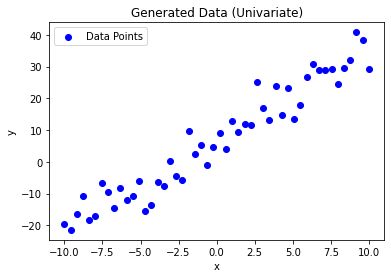

In [11]:
X, y = generate_data(n=50, noise=5)
plt.scatter(X, y, color="blue", label="Data Points")
plt.title("Generated Data (Univariate)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


### Engineering Polynomial Features

In [12]:
def polynomial_maker(X, degree):
    X_ploy = np.c_[np.ones(len(X))]
    for i in range(1, degree+1):
        X_ploy = np.c_[X_ploy, X**i]
    return X_ploy


In [13]:
def polynomial_regression_closed_form(X, y, degree):
    X_poly =  polynomial_maker(X, degree)
    #(x^T x)^-1 * y^T * X 
    w = np.dot(inv(np.dot(X_poly.transpose(), X_poly)), np.dot(y.T, X_poly ) ) 
    return w

def print_parameter_vectors(w):
    for i in range(len(w)):
        print(f"w{i} = {w[i]}")

# # Get parameter vector w
w = polynomial_regression_closed_form(X, y, degree=5)
print_parameter_vectors(w)


w0 = 5.881128112603928
w1 = 3.5595776202593896
w2 = 0.03281089452615005
w3 = -0.021549373415360673
w4 = -6.78082559586006e-05
w5 = 0.00013817549375433336


### Visualize the Polynomial Fit

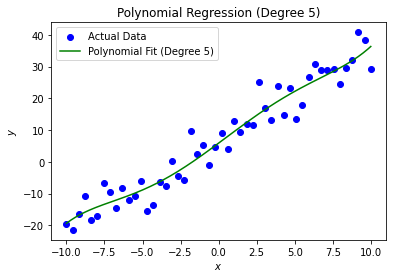

In [46]:
X_fit = np.linspace(X.min(), X.max(), 200)
X_fit_poly = polynomial_maker(X_fit, degree=5)
y_poly_predicted = X_fit_poly.dot(w)  # h_w(x) = X' * w


# Plot the actual data and the polynomial fit
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X_fit, y_poly_predicted, color='green', label=f'Polynomial Fit (Degree {5})')
plt.title(f"Polynomial Regression (Degree {5})")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.show()

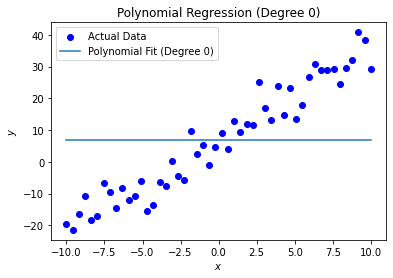

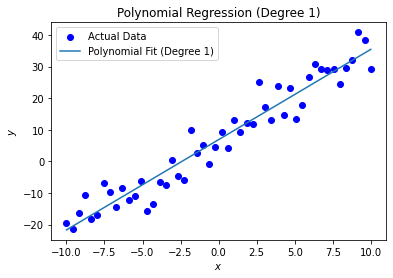

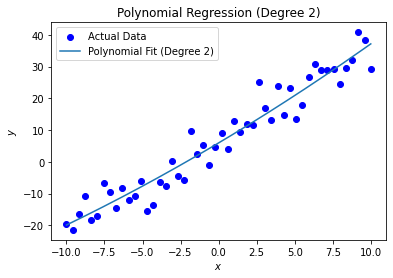

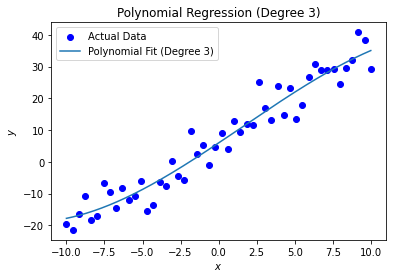

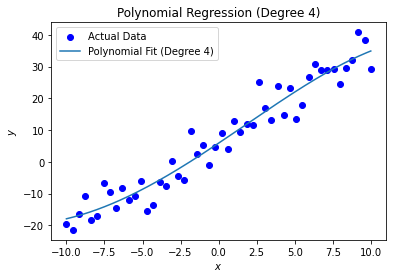

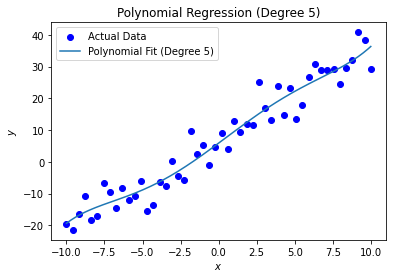

In [52]:
import numpy as np
import matplotlib.pyplot as plt

degree = 6

# Assuming w, X, and y are already defined
for degree in range(0, degree):
    w = polynomial_regression_closed_form(X, y, degree)

    # Create an array of 200 evenly spaced values between the minimum and maximum values of X
    X_fit = np.linspace(X.min(), X.max(), 200)
    
    # Create a polynomial of degree i using the polynomial_maker function
    X_fit_poly = polynomial_maker(X_fit, degree)
    
    # Calculate the predicted values of y using the polynomial fit
    y_poly_predicted = X_fit_poly.dot(w)  # h_w(x) = X' * w
    
    # Create a new figure
    plt.figure()
    
    # Plot the actual data and the polynomial fit
    plt.scatter(X, y, color='blue', label='Actual Data')
    plt.plot(X_fit, y_poly_predicted, label=f'Polynomial Fit (Degree {degree})')
    
    # Set the title of the plot to include the degree of the polynomial
    plt.title(f"Polynomial Regression (Degree {degree})")
    
    # Set the labels for the x and y axes
    plt.xlabel("$x$")
    plt.ylabel("$y$")
    
    # Add a legend to the plot
    plt.legend()
    
    # Display the plot
    plt.show()


### Visualizing RMSE for different Polynomial degrees
We could visualize the $ E_{rms} $ better if we split generated data into train and test datasets: